# Clustering Countries - Indirect Effects

In [38]:
%matplotlib notebook

from IPython.display import display_html 

from tools import Preprocessing, Clustering, benchClustering, plotBarh

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from scipy.cluster import hierarchy


from fancyimpute import KNN

import plotly.plotly as py

import matplotlib as mpl
import matplotlib.pyplot as plt
import bqplot as bqp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pylab

import ipyvolume as ipv
from ipywidgets import FloatSlider, ColorPicker, VBox, jslink


sns.set(context='notebook', style='whitegrid', font='sans-serif',
        palette='muted', font_scale=1, color_codes=True, rc=None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 10000)

In [39]:
on_PC = 0
n_init = 10

In [40]:
# import the csv dataset as a pandas DataFrame
# df = pd.read_csv('data/full_data.csv')
#df.columns
# list(df.columns)

**Indirect effects** occur to industries in the backward­linked industries that supply the exporting firm. [Wayne P. Miller]

Il valore dei moltiplicatori d'impatto indiretto dipende da:
 - Sviluppo del settore petrolifero, che incide sulla disponibilità di suppliers specializzati
     - Produzione di petrolio (bdp)
     - Produzione di petrolio (bdp)/GDP(US$)? In realtà, ciò che ci interessa è il valore assoluto della produzione, non relativo alla ricchezza totale del paese.
     - Numero di siti di estrazione?
 - Sviluppo industriale di un paese. (I suppliers avranno bisogno di materie prime, lavorazioni di vario genere, trasporti etc.)
 - Livello di importazione: più un paese è propenso all'importazione, meno la spesa dei suppliers sarà rivolta internamente al paese.


In [41]:
varlist = [
    'Production_Oil_bpd_2016',
    'ImportGoodsServices_%GDP',
    'MVAsh%_2015',
#    'MVApc_constantUS$_2015',
#   'Production_Oil_bpd_2014',
#   'Production_Oil_bpd_2015',
#   'MHMVAsh%_2015',
          ]

In [42]:
prep = Preprocessing('data/full_data.csv',
                     varlist=varlist, verbose=True)
prep.exportCSV('data/cleaned_data_petroleum.csv', impute=True)

MISSING VALUES FOR EACH FEATURE:
MVAsh%_2015                 3
ImportGoodsServices_%GDP    1
dtype: int64 

MISSING VALUES FOR EACH COUNTRY:
Country Code
TKM    2
TLS    1
LBY    1
dtype: int64


In [43]:
# for c in prep.df.columns[1:]:
#     plotBarh(df=prep.df, by_column=c )

CUMULATIVE PROPORTION OF VARIANCE EXPLAINED BY PCs


<IPython.core.display.Javascript object>


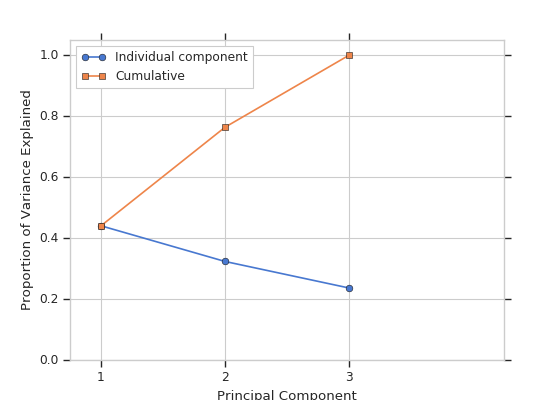

<IPython.core.display.Javascript object>


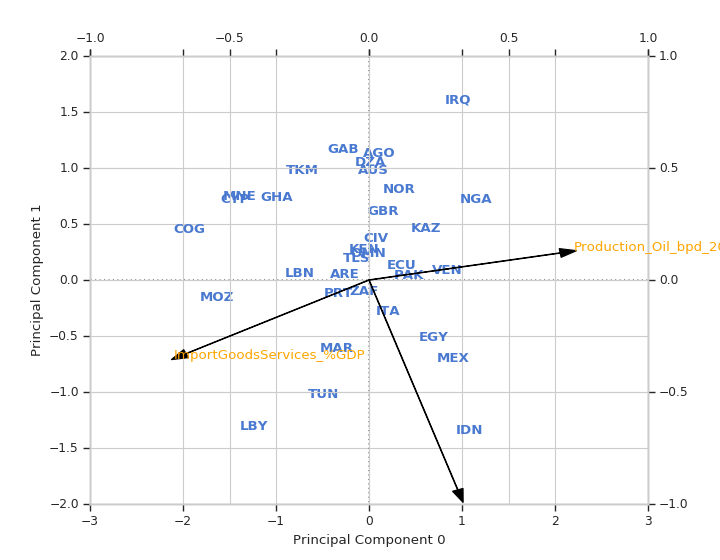

In [44]:
data = Clustering('data/cleaned_data_petroleum.csv', verbose=False)
data.getPC()
data.plotAlongPC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2], loadings=True, clustering=None)

In [27]:
x = data.df.iloc[:, 0]
y = data.df.iloc[:, 1]
z = data.df.iloc[:, 2]
print('x = ', x.name)
print('y = ', y.name)
print('z = ', z.name)

selected = None
ipv.figure()
scatter = ipv.pylab.scatter(x, y, z, marker="sphere", color = 'red', size=5, size_selected=8, selected=selected)
# ipv.pylab.xyzlabel(x.name, y.name, z.name)

size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((scatter, 'size'), (size, 'value'))
jslink((scatter, 'size_selected'), (size_selected, 'value'))
jslink((scatter, 'color'), (color, 'value'))
jslink((scatter, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])

x =  Production_Oil_bpd_2016
y =  ImportGoodsServices_%GDP
z =  MVAsh%_2015


<IPython.core.display.Javascript object>


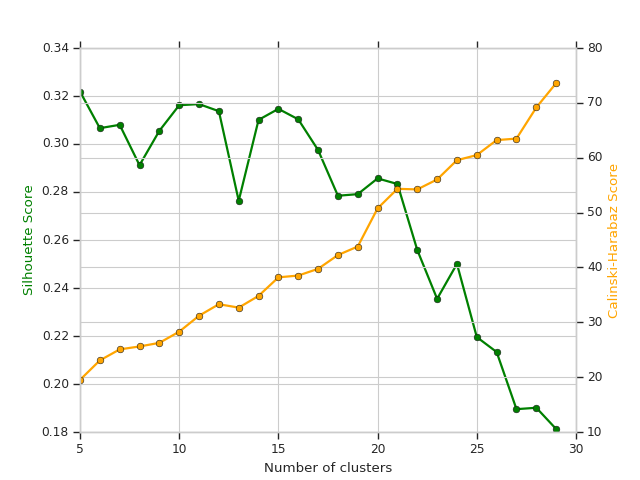

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



In [45]:
k_min = 5
k_max = 30
silh, calha = data.multipleKmeans(k_min=5, k_max=30, on_PC=0, n_init=n_init)

In [46]:
k_clusters = 10
data.kmeans(n_clusters=k_clusters, on_PC=on_PC)
# data.clusterings['kmeans'+str(n_clusters)]

In [37]:
data.gmBIC(n_min=1, n_max=30, covariance_type='full', n_init=n_init, on_PC=on_PC)

NameError: name 'n_init' is not defined

In [12]:
n_components = 21
data.gaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)
data.bayesianGaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)

Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


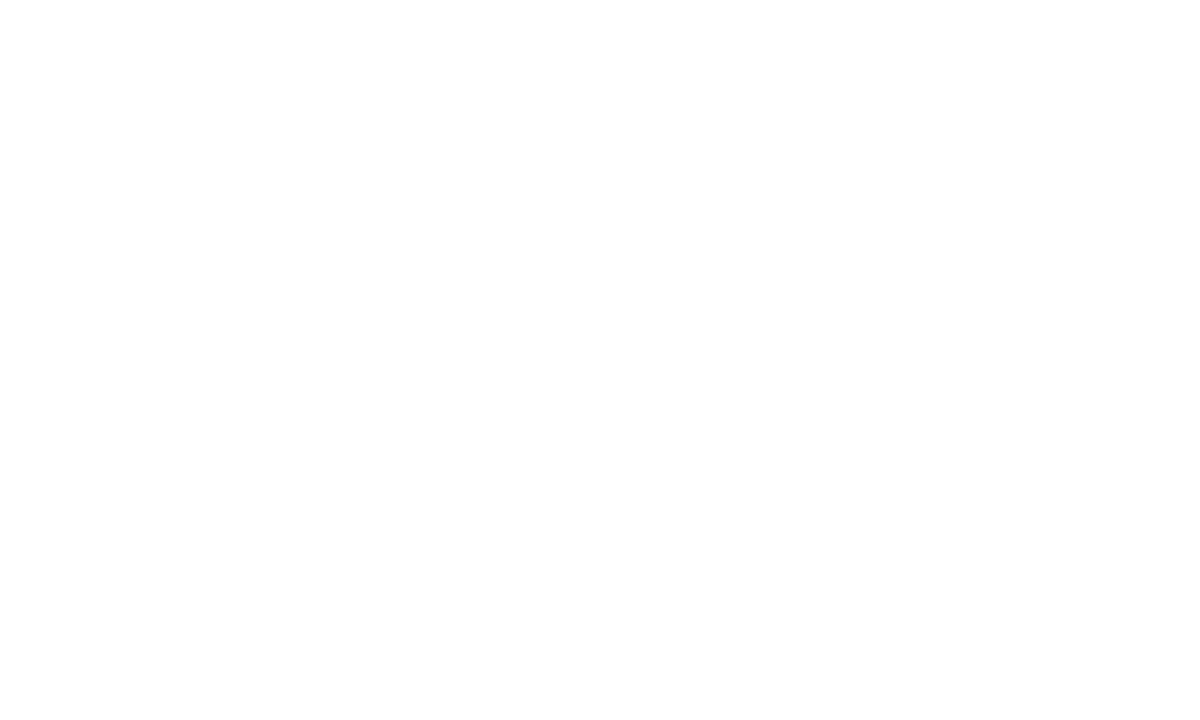

In [13]:
data.hierarchicalClustering(metric='euclidean', method='ward', threshold=1.5, on_PC=0, heatmap=False)

Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


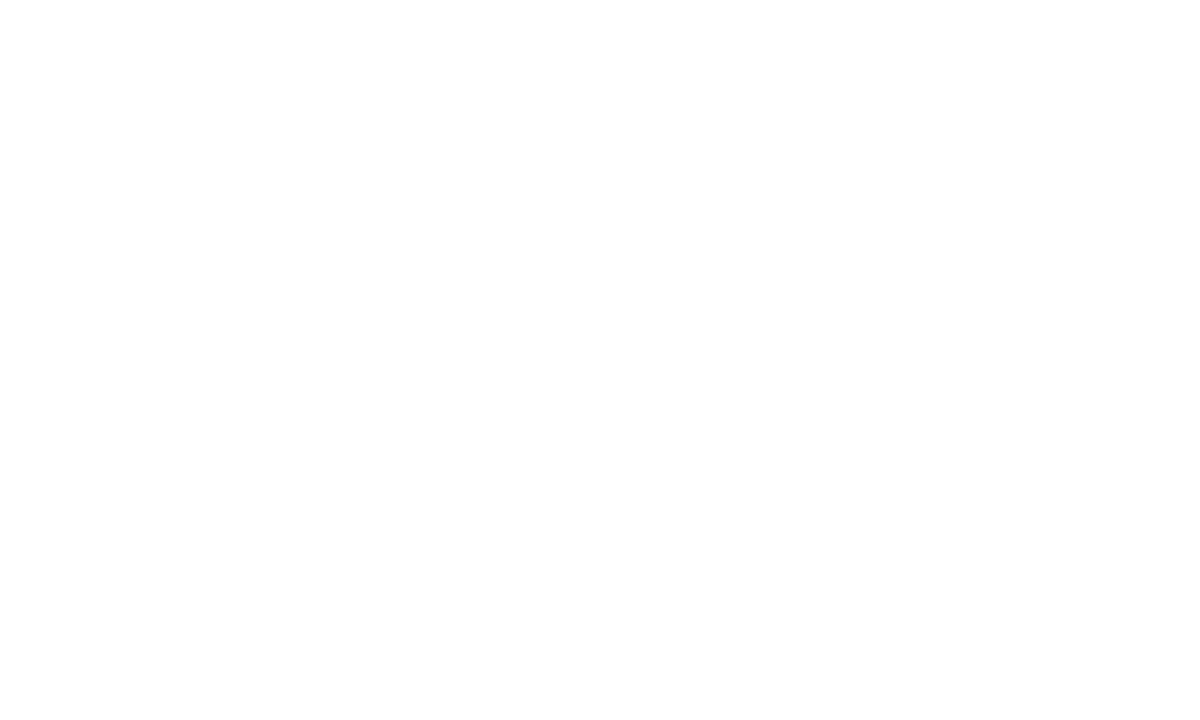

In [14]:
data.hierarchicalClustering(metric='euclidean', method='complete', threshold=1.5, on_PC=on_PC, heatmap=False)

In [15]:
data.clusterings.keys()

dict_keys(['hierarchical_complete_euclidean', 'bayesian gm21', 'hierarchical_ward_euclidean', 'kmeans10', 'gm21'])

In [16]:
# display all clusters together
# newdf = np.zeros(len(data.clusterings.keys()))
styler = []
for k in data.clusterings.keys():
    styler.append(data.clusterings[k].style.set_table_attributes("style='display:inline'"))
display_html(styler[0]._repr_html_() + styler[1]._repr_html_() + styler[2]._repr_html_() + styler[3]._repr_html_() + styler[4]._repr_html_(), raw=True)

,hierarchical_complete_euclidean
Cluster,
1,['China']
2,['United States']
3,"['Ireland', 'Libya', 'Vietnam']"
4,"['Egypt', 'Indonesia', 'Mexico']"
5,"['Lebanon', 'Morocco', 'Portugal', 'Tunisia']"
6,"['Algeria', 'Angola', 'Australia', 'Gabon', 'Norway', 'Oman', 'United Kingdom']"
7,"[""Cote d'Ivoire"", 'Ecuador', 'Italy', 'Kazakhstan', 'Kenya', 'Nigeria', 'Pakistan', 'South Africa', 'Timor-Leste', 'Venezuela RB']"
8,"['Congo Rep', 'Mozambique']"
9,"['Cyprus', 'Ghana', 'Montenegro', 'Turkmenistan']"


<IPython.core.display.Javascript object>


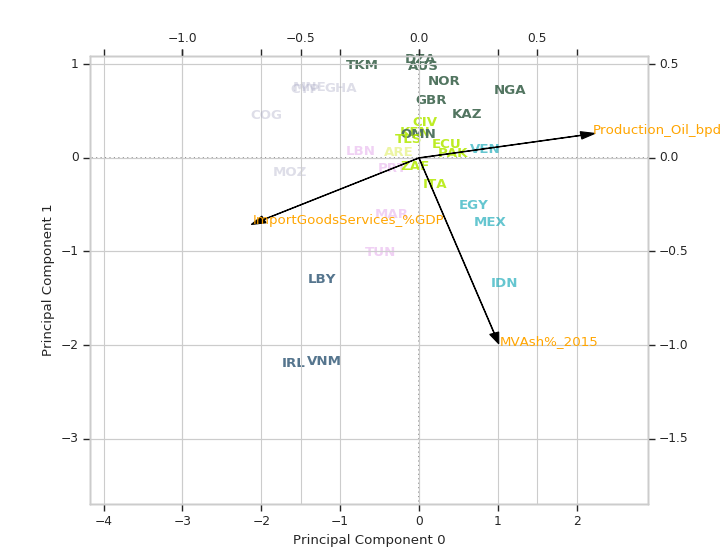

kmeans10
[[0.30481313 0.44833634 0.36484106 0.98290523]
 [0.8349408  0.47968675 0.87926863 0.34765295]
 [0.78582832 0.2236756  0.77232205 0.4564534 ]
 [0.10749932 0.27326245 0.40227462 0.74929291]
 [0.07298271 0.659547   0.71601364 0.65392137]
 [0.76066964 0.17816862 0.58710336 0.94114495]
 [0.61078427 0.61133635 0.73643964 0.33320423]
 [0.7004759  0.91623383 0.01089547 0.87011304]
 [0.21861833 0.45592327 0.8523478  0.82391213]
 [0.89192748 0.94041679 0.44715696 0.65636381]]


In [29]:
data.plotAlongPC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2], loadings=True, clustering='kmeans10')

In [11]:
data.df.iloc[:, 0]

Country Code
DZA    0.170609
AGO    0.415229
AUS   -0.444120
CHN    1.699162
COG   -0.497400
CIV   -0.583921
CYP   -0.612375
ECU   -0.293911
EGY   -0.254822
GAB   -0.489953
GHA   -0.555257
IDN   -0.129459
IRQ    1.972591
IRL   -0.612375
ITA   -0.571334
KAZ    0.313947
KEN   -0.612375
LBN   -0.612375
LBY   -0.388990
MEX    0.657528
MNE   -0.612375
MAR   -0.612282
MOZ   -0.612375
NGA    0.474221
NOR    0.344593
OMN   -0.027709
PAK   -0.562724
PRT   -0.612375
ZAF   -0.611213
TLS   -0.583783
TUN   -0.590308
TKM   -0.478363
ARE    1.191303
GBR   -0.070575
USA    4.520814
VEN    0.709845
VNM   -0.437093
Name: Production_Oil_bpd_2016, dtype: float64

In [13]:
import plotly.plotly as py
import pandas as pd

df = data.df

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",    
    x = df.iloc[:, 0], y = df.iloc[:, 1], z = df.iloc[:, 2],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",    
    x = df.iloc[:, 0], y = df.iloc[:, 1], z = df.iloc[:, 2],
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~WolfLo/0 or inside your plot.ly account where it is named '3d point clustering'


In [4]:
import plotly
import plotly.graph_objs as go

plotly.offline.plot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
}, auto_open=True)

'file:///home/lupol/dev/clustering-economies/temp-plot.html'

In [21]:
# data.hdbscan(min_cluster_size=2, on_PC=0)
# data.clusterings['hdbscan']

In [17]:
import sklearn
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

In [65]:
for name, labels in data.clusterings_labels.items():
    print(name)
    print(labels)

kmeans10
[0 0 0 8 6 7 6 7 4 0 6 4 2 3 7 0 7 1 3 4 6 1 6 0 0 0 7 1 7 7 1 0 9 0 5 4 3]


In [72]:
X

array([[ 0.1706091 , -0.30609206, -0.9561517 ],
       [ 0.4152285 , -0.23284456, -1.03737611],
       [-0.44411974, -0.90434545, -0.74801417],
       [ 1.69916187, -1.02182409,  3.55349497],
       [-0.49739969,  1.86659703, -1.16767359],
       [-0.58392084, -0.79510623, -0.15744505],
       [-0.61237481,  0.99880743, -1.16598142],
       [-0.29391059, -0.77862481,  0.12684037],
       [-0.25482168, -0.91263315,  0.86970524],
       [-0.48995326, -0.60823146, -1.06445091],
       [-0.55525745,  0.45068447, -0.98322651],
       [-0.12945858, -0.92033531,  1.77501893],
       [ 1.97259064, -0.07664938, -1.40457811],
       [-0.61237481,  2.48114902,  1.43827608],
       [-0.5713344 , -0.66859697,  0.49911889],
       [ 0.31394672, -0.68947909, -0.17098245],
       [-0.61237481, -0.6166662 , -0.11683285],
       [-0.61237481,  0.3726833 , -0.24036163],
       [-0.38899038,  1.83199386,  0.73910472],
       [ 0.65752831, -0.22875683,  0.94416095],
       [-0.61237481,  0.91120598, -1.160

In [78]:
len(data.clusterings_labels['kmeans10'])

37

In [86]:
np.random.seed(5)

fig = tools.make_subplots(rows=2, cols=3,
                          print_grid=False,
                          specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
                                 [ {'is_3d': True, 'rowspan':1}, None, None]])
scene = dict(
    camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2.5, y=0.1, z=0.1)
    ),
    xaxis=dict(
        range=[-1, 4],
        title=data.df.columns[0],
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    yaxis=dict(
        range=[4, 8],
        title=data.df.columns[1],
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    zaxis=dict(
        range=[1,8],
        title=data.df.columns[2],
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    )
)

centers = [[1, 1], [-1, -1], [1, -1]]

X = data.df.values
# y = data.clusterings_labels['kmeans10']

# estimators = {'k_means_iris_3': KMeans(n_clusters=3),
#               'k_means_iris_8': KMeans(n_clusters=8),
#               'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
#                                               init='random')}
fignum = 1
for name, labels in data.clusterings_labels.items():
    
    trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
                         showlegend=False,
                         mode='markers',
                         marker=dict(
                                color=labels.astype(np.float),
                                line=dict(color='black', width=1)
        ))
    fig.append_trace(trace, 1, fignum)
    fignum = fignum + 1

# y = np.choose(y, [1, 2, 0]).astype(np.float)

# trace1 = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
#                       showlegend=False,
#                       mode='markers',
#                       marker=dict(
#                             color=y,
#                             line=dict(color='black', width=1)))
# fig.append_trace(trace1, 2, 1)

fig['layout'].update(height=900, width=900,
                     margin=dict(l=10,r=10))

fig['layout']['scene1'].update(scene)
# fig['layout']['scene2'].update(scene)
# fig['layout']['scene3'].update(scene)
# fig['layout']['scene4'].update(scene)
#fig['layout']['scene5'].update(scene)

# py.iplot(fig)

In [85]:
labels

array([0, 0, 0, 8, 6, 7, 6, 7, 4, 0, 6, 4, 2, 3, 7, 0, 7, 1, 3, 4, 6, 1,
       6, 0, 0, 0, 7, 1, 7, 7, 1, 0, 9, 0, 5, 4, 3], dtype=int32)

In [92]:
X[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [89]:
np.random.seed(5)

fig = tools.make_subplots(rows=2, cols=3,
                          print_grid=False,
                          specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
                                 [ {'is_3d': True, 'rowspan':1}, None, None]])
scene = dict(
    camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2.5, y=0.1, z=0.1)
    ),
    xaxis=dict(
        range=[-1, 4],
        title='Petal width',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    yaxis=dict(
        range=[4, 8],
        title='Sepal length',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    ),
    zaxis=dict(
        range=[1,8],
        title='Petal length',
        gridcolor='rgb(255, 255, 255)',
        zerolinecolor='rgb(255, 255, 255)',
        showbackground=True,
        backgroundcolor='rgb(230, 230,230)',
        showticklabels=False, ticks=''
    )
)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}
fignum = 1
for name, est in estimators.items():
    est.fit(X)
    labels = est.labels_

    trace = go.Scatter3d(x=X[:, 3], y=X[:, 0], z=X[:, 2],
                         showlegend=False,
                         mode='markers',
                         marker=dict(
                                color=labels.astype(np.float),
                                line=dict(color='black', width=1)
        ))
    fig.append_trace(trace, 1, fignum)
    
    fignum = fignum + 1

y = np.choose(y, [1, 2, 0]).astype(np.float)

trace1 = go.Scatter3d(x=X[:, 3], y=X[:, 0], z=X[:, 2],
                      showlegend=False,
                      mode='markers',
                      marker=dict(
                            color=y,
                            line=dict(color='black', width=1)))
fig.append_trace(trace1, 2, 1)

fig['layout'].update(height=900, width=900,
                     margin=dict(l=10,r=10))

fig['layout']['scene1'].update(scene)
fig['layout']['scene2'].update(scene)
fig['layout']['scene3'].update(scene)
fig['layout']['scene4'].update(scene)
py.iplot(fig)